In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [2]:
df = pd.read_csv("Train Data.csv")
df

C:\Users\JO Ron\AppData\Local\Temp\ipykernel_28548\3260602782.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train Data.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133256,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595029,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847745,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.6725822,Low_spent_Large_value_payments,319.164979,Standard


In [3]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633330,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [4]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [5]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [6]:
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].mean())
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].mean())

In [7]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [8]:
df.drop(['ID', 'Month', 'Age', 'Customer_ID', 'Name', 'Occupation', 'SSN', 'Credit_Mix', 'Type_of_Loan', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_Behaviour', 'Monthly_Balance', 'Num_Bank_Accounts', 'Num_Credit_Card'], axis = 1, inplace = True)
df

,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Credit_Score
0,19114.12,1824.843333,3,4,3,7,11.27,4.0,809.98,No,49.574949,80.41529544,Good
1,19114.12,4194.170850,3,4,-1,NaN,11.27,4.0,809.98,No,49.574949,118.2802216,Good
2,19114.12,4194.170850,3,4,3,7,_,4.0,809.98,No,49.574949,81.69952126,Good
3,19114.12,4194.170850,3,4,5,4,6.27,4.0,809.98,No,49.574949,199.4580744,Good
4,19114.12,1824.843333,3,4,6,NaN,11.27,4.0,809.98,No,49.574949,41.42015309,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39628.99,3359.415833,7,2,23,7,11.5,3.0,502.38,No,35.104023,60.97133256,Poor
99996,39628.99,3359.415833,7,2,18,7,11.5,3.0,502.38,No,35.104023,54.18595029,Poor
99997,39628.99,3359.415833,5729,2,27,6,11.5,3.0,502.38,No,35.104023,24.02847745,Poor
99998,39628.99,3359.415833,7,2,20,NaN,11.5,3.0,502.38,No,35.104023,251.6725822,Standard


In [9]:
label_encoder = LabelEncoder()
df['Credit_Score'] = label_encoder.fit_transform(df['Credit_Score'])
df['Payment_of_Min_Amount'] = label_encoder.fit_transform(df['Payment_of_Min_Amount'])
df['Num_of_Delayed_Payment'] = label_encoder.fit_transform(df['Num_of_Delayed_Payment'])
df

,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Credit_Score
0,19114.12,1824.843333,3,4,3,685,11.27,4.0,809.98,1,49.574949,80.41529544,0
1,19114.12,4194.170850,3,4,-1,749,11.27,4.0,809.98,1,49.574949,118.2802216,0
2,19114.12,4194.170850,3,4,3,685,_,4.0,809.98,1,49.574949,81.69952126,0
3,19114.12,4194.170850,3,4,5,570,6.27,4.0,809.98,1,49.574949,199.4580744,0
4,19114.12,1824.843333,3,4,6,749,11.27,4.0,809.98,1,49.574949,41.42015309,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39628.99,3359.415833,7,2,23,685,11.5,3.0,502.38,1,35.104023,60.97133256,1
99996,39628.99,3359.415833,7,2,18,685,11.5,3.0,502.38,1,35.104023,54.18595029,1
99997,39628.99,3359.415833,5729,2,27,671,11.5,3.0,502.38,1,35.104023,24.02847745,1
99998,39628.99,3359.415833,7,2,20,749,11.5,3.0,502.38,1,35.104023,251.6725822,2


In [10]:
df.dtypes

Annual_Income               object
Monthly_Inhand_Salary      float64
Interest_Rate                int64
Num_of_Loan                 object
Delay_from_due_date          int64
Num_of_Delayed_Payment       int32
Changed_Credit_Limit        object
Num_Credit_Inquiries       float64
Outstanding_Debt            object
Payment_of_Min_Amount        int32
Total_EMI_per_month        float64
Amount_invested_monthly     object
Credit_Score                 int32
dtype: object

In [11]:
label_encoder = LabelEncoder()
df['Changed_Credit_Limit'] = label_encoder.fit_transform(df['Changed_Credit_Limit'])
df['Outstanding_Debt'] = label_encoder.fit_transform(df['Outstanding_Debt'])
df['Amount_invested_monthly'] = label_encoder.fit_transform(df['Amount_invested_monthly'])
df['Annual_Income'] = label_encoder.fit_transform(df['Annual_Income'])
df['Num_of_Loan'] = label_encoder.fit_transform(df['Num_of_Loan'])
df

,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Credit_Score
0,6011,1824.843333,3,244,3,685,858,4.0,12062,1,49.574949,81513,0
1,6011,4194.170850,3,244,-1,749,858,4.0,12062,1,49.574949,7661,0
2,6011,4194.170850,3,244,3,685,3634,4.0,12062,1,49.574949,82226,0
3,6011,4194.170850,3,244,5,570,3261,4.0,12062,1,49.574949,30358,0
4,6011,1824.843333,3,244,6,749,858,4.0,12062,1,49.574949,55363,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,11484,3359.415833,7,174,23,685,881,3.0,10142,1,35.104023,69764,1
99996,11484,3359.415833,7,174,18,685,881,3.0,10142,1,35.104023,65282,1
99997,11484,3359.415833,5729,174,27,671,881,3.0,10142,1,35.104023,37143,1
99998,11484,3359.415833,7,174,20,749,881,3.0,10142,1,35.104023,39061,2


In [12]:
df.dtypes

Annual_Income                int32
Monthly_Inhand_Salary      float64
Interest_Rate                int64
Num_of_Loan                  int32
Delay_from_due_date          int64
Num_of_Delayed_Payment       int32
Changed_Credit_Limit         int32
Num_Credit_Inquiries       float64
Outstanding_Debt             int32
Payment_of_Min_Amount        int32
Total_EMI_per_month        float64
Amount_invested_monthly      int32
Credit_Score                 int32
dtype: object

In [13]:
X = df
y = df['Credit_Score']

In [14]:
X.shape, y.shape

((100000, 13), (100000,))

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.52

Confusion Matrix:
[[ 174   57 1517]
 [  64  449 2432]
 [ 275  458 4574]]

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.10      0.15      1748
           1       0.47      0.15      0.23      2945
           2       0.54      0.86      0.66      5307

    accuracy                           0.52     10000
   macro avg       0.45      0.37      0.35     10000
weighted avg       0.48      0.52      0.45     10000



C:\Users\JO Ron\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the performance of the model
daccuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {daccuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

import pickle

pickle.dump(dt_classifier, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))

Accuracy: 1.00

Confusion Matrix:
[[1748    0    0]
 [   0 2945    0]
 [   0    0 5307]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1748
           1       1.00      1.00      1.00      2945
           2       1.00      1.00      1.00      5307

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the model
raccuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {raccuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

pickle.dump(rf_classifier, open('model1.pkl','wb'))

model1 = pickle.load(open('model1.pkl','rb'))

Accuracy: 1.00

Confusion Matrix:
[[1748    0    0]
 [   0 2945    0]
 [   0    0 5307]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1748
           1       1.00      1.00      1.00      2945
           2       1.00      1.00      1.00      5307

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



### SVM

In [20]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance of the model
saccuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {saccuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

pickle.dump(svm_classifier, open('model2.pkl','wb'))

model2 = pickle.load(open('model2.pkl','rb'))

Accuracy: 1.00

Confusion Matrix:
[[1748    0    0]
 [   0 2945    0]
 [   0    0 5307]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1748
           1       1.00      1.00      1.00      2945
           2       1.00      1.00      1.00      5307

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



###  KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier (You can specify the number of neighbors with the 'n_neighbors' parameter)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the performance of the model
kaccuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {kaccuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

pickle.dump(knn_classifier, open('model3.pkl','wb'))

model3 = pickle.load(open('model3.pkl','rb'))

Accuracy: 0.99

Confusion Matrix:
[[1737   11    0]
 [  25 2889   31]
 [   0    6 5301]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1748
           1       0.99      0.98      0.99      2945
           2       0.99      1.00      1.00      5307

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### NB

In [22]:
from sklearn.naive_bayes import GaussianNB

# Initializing the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Training the classifier
nb_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the performance of the model
naccuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {naccuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

pickle.dump(nb_classifier, open('model4.pkl','wb'))

model4 = pickle.load(open('model4.pkl','rb'))

Accuracy: 1.00

Confusion Matrix:
[[1748    0    0]
 [   0 2945    0]
 [   0    0 5307]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1748
           1       1.00      1.00      1.00      2945
           2       1.00      1.00      1.00      5307

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



### XGBoost 

In [23]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
model = XGBClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
xaccuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {xaccuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

pickle.dump(model, open('model5.pkl','wb'))

model5 = pickle.load(open('model5.pkl','rb'))

Accuracy: 1.00

Confusion Matrix:
[[1748    0    0]
 [   0 2945    0]
 [   0    0 5307]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1748
           1       1.00      1.00      1.00      2945
           2       1.00      1.00      1.00      5307

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



### Linear Discriminant Analysis 

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model on the training data
lda.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lda.predict(X_test)

# Evaluate the performance of the model
ldaaccuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {ldaaccuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

pickle.dump(lda, open('model6.pkl','wb'))

model6 = pickle.load(open('model6.pkl','rb'))

Accuracy: 1.00

Confusion Matrix:
[[1748    0    0]
 [   0 2945    0]
 [   0    0 5307]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1748
           1       1.00      1.00      1.00      2945
           2       1.00      1.00      1.00      5307

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



### Compare

                 Model  Accuracy
0  Logistic Regression    0.5197
1        Decision Tree    1.0000
2        Random Forest    1.0000
3                  SVM    1.0000
4                   NB    1.0000
5                  KNN    0.9927
6              XGBoost    1.0000
7                  LDA    1.0000


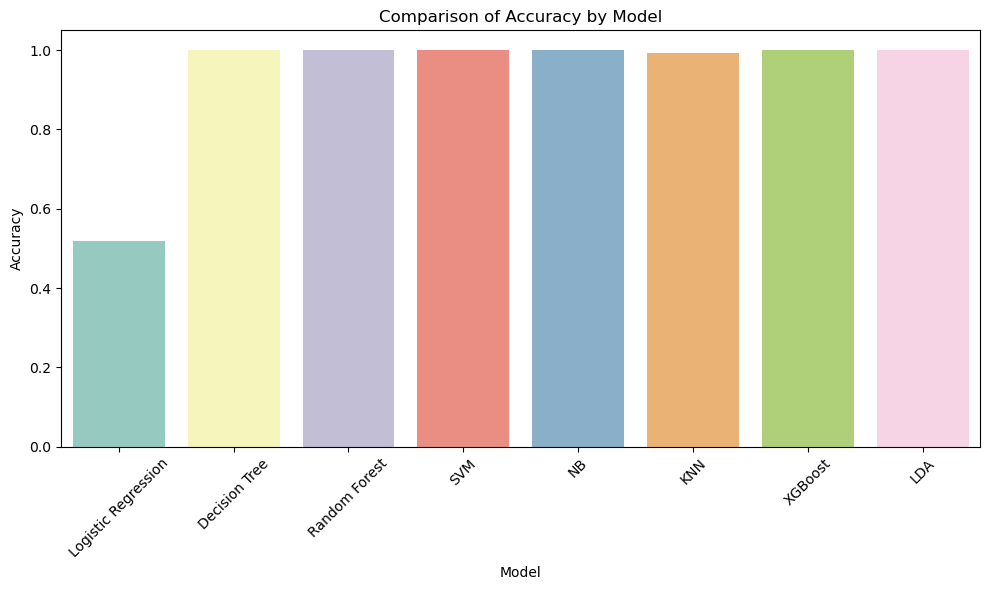

In [25]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'NB', 'KNN', 'XGBoost', 'LDA'],
    'Accuracy' :[accuracy, daccuracy, raccuracy, saccuracy, naccuracy, kaccuracy, xaccuracy, ldaaccuracy]
})
print(models)

# Plotting the accuracy using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=models, palette='Set3')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy by Model')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()